In [1]:
%load_ext autoreload
%autoreload 2
    
import pandas as pd
pd.set_option('display.max_rows', 100)

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

from utils import *

import sys
sys.path.append("../")

# Shows files

In [2]:
config_names = ["MESSI+\nSAX+\nSIMD",
               #"MESSI+\nSFA+ED",
               "MESSI+\nSFA+ED+\nSIMD",
               #"MESSI+\nSFA+EW",
               "MESSI+\nSFA+EW+\nSIMD"]

        
path = "logs/MESSI_SFA_logs"
all_files = read_logs(log_type="query", path=path, config_names = config_names)

Config logs/MESSI_SFA_logs/ASTRO/09
Config logs/MESSI_SFA_logs/ASTRO/18
Config logs/MESSI_SFA_logs/ASTRO/36
-----------------
Config logs/MESSI_SFA_logs/BIGANN/09
Config logs/MESSI_SFA_logs/BIGANN/18
Config logs/MESSI_SFA_logs/BIGANN/36
-----------------
Config logs/MESSI_SFA_logs/DEEP1B/09
Config logs/MESSI_SFA_logs/DEEP1B/18
Config logs/MESSI_SFA_logs/DEEP1B/36
-----------------
Config logs/MESSI_SFA_logs/ETHC/09
Config logs/MESSI_SFA_logs/ETHC/18
Config logs/MESSI_SFA_logs/ETHC/36
-----------------
Config logs/MESSI_SFA_logs/ISC_EHB_DepthPhases/09
Config logs/MESSI_SFA_logs/ISC_EHB_DepthPhases/18
Config logs/MESSI_SFA_logs/ISC_EHB_DepthPhases/36
-----------------
Config logs/MESSI_SFA_logs/Iquique/09
Config logs/MESSI_SFA_logs/Iquique/18
Config logs/MESSI_SFA_logs/Iquique/36
-----------------
Config logs/MESSI_SFA_logs/LenDB/09
Config logs/MESSI_SFA_logs/LenDB/18
Config logs/MESSI_SFA_logs/LenDB/36
-----------------
Config logs/MESSI_SFA_logs/Meier2019JGR/09
Config logs/MESSI_SFA_lo

In [3]:
query_times = pd.DataFrame(columns=["method", "querying time", "config", "dataset"])

i = 0
for ds_name, files in all_files.items():
    df_all = pd.DataFrame()
    for name, file in files.items():
        # print(file)
        df = pd.read_csv(file).iloc[:-1]  # last entry is the average        
        df["querying time"] = df["querying time"] / 1_000_000
        
        #print("Median:\t", name.replace("\n",""), "    \t", 
        #     np.round(df["querying time"].describe().loc["50%"], 3))  # * 10e-6

        df["method"] = name
        df["config"] = file.split("/")[3]
        df["dataset"] = file.split("/")[2]
        df_all = pd.concat([df_all, df], ignore_index=True)        
        query_times = pd.concat([query_times, df[["method", "querying time", "config", "dataset"]]], ignore_index=True)

        i = i+1
        
subset = query_times.rename(columns={
    "config":"Cores", "dataset": "Dataset", "method": "Method",
    "querying time" : "query time in s"})
# subset = subset[query_times.method.isin(["MESSI+\nSAX+\nSIMD", "MESSI+\nSFA+ED+\nSIMD", "MESSI+\nSFA+EW+\nSIMD"])]
subset = subset[query_times.method.isin(["MESSI+\nSAX+\nSIMD", "MESSI+\nSFA+EW+\nSIMD"])]
subset.Method.replace("MESSI+\nSAX+\nSIMD", "MESSI", inplace=True)
subset.Method.replace("MESSI+\nSFA+EW+\nSIMD", "SOFA", inplace=True)

subset

,Method,query time in s,Cores,Dataset
0,MESSI,0.008521,09,ASTRO
1,MESSI,0.008044,09,ASTRO
2,MESSI,0.006955,09,ASTRO
3,MESSI,0.006191,09,ASTRO
4,MESSI,0.006551,09,ASTRO
...,...,...,...,...
15295,SOFA,0.380433,36,TXED
15296,SOFA,0.573906,36,TXED
15297,SOFA,0.287192,36,TXED
15298,SOFA,0.388578,36,TXED


In [4]:
UCR_SUITE_all_files = read_UCR_logs()
UCR_SUITE_query_times = pd.DataFrame(columns=["Method", "query time in s", "Cores", "Dataset"])

i = 0
for ds_name, files in UCR_SUITE_all_files.items():
    df_all = pd.DataFrame()
    for config, file in files.items():
        # print(file)
        df = pd.read_csv(file) #.iloc[:-1]
        # display(df)
        df["query time in s"] = df[" querying time"] / 1e6        
        df["Method"] = "UCR SUITE"
        if config == "9":
            config = "09"
        df["Cores"] = config
        name = file.split("/")[2]
    
        df["Dataset"] = name[:name.rfind("_")]
        df_all = pd.concat([df_all, df], ignore_index=True)        
        UCR_SUITE_query_times = pd.concat([
            UCR_SUITE_query_times, df[["Method", "query time in s", "Cores", "Dataset"]]], ignore_index=True)
        i = i+1
        
UCR_SUITE_query_times

,Method,query time in s,Cores,Dataset
0,UCR SUITE,1.902999,18,ASTRO
1,UCR SUITE,1.952496,18,ASTRO
2,UCR SUITE,2.007568,18,ASTRO
3,UCR SUITE,1.932327,18,ASTRO
4,UCR SUITE,1.987974,18,ASTRO
...,...,...,...,...
5095,UCR SUITE,1.332953,09,TXED
5096,UCR SUITE,1.374437,09,TXED
5097,UCR SUITE,1.275523,09,TXED
5098,UCR SUITE,1.308311,09,TXED


In [5]:
FAISS_all_files = read_faiss_logs()
FAISS_query_times = pd.DataFrame(columns=["Method", "query time in s", "Cores", "Dataset"])

i = 0
for ds_name, files in FAISS_all_files.items():
    df_all = pd.DataFrame()
    for config, file in files.items():
        # print(file)
        df = pd.read_csv(file) #.iloc[:-1]
        # display(df)
        df["query time in s"] = df[" total"] / 100 / 1000
        df["Method"] = "FAISS"
        if config == "9":
            config = "09"
        df["Cores"] = config
        name = file.split("/")[2]
        df["Dataset"] = name[name.find("_")+1:name.rfind("_")]
        
        df_all = pd.concat([df_all, df], ignore_index=True)        
        FAISS_query_times = pd.concat([
            FAISS_query_times, df[["Method", "query time in s", "Cores", "Dataset"]]], ignore_index=True)
        i = i+1
        
FAISS_query_times

,Method,query time in s,Cores,Dataset
0,FAISS,0.213254,18,ASTRO
1,FAISS,0.213254,18,ASTRO
2,FAISS,0.213254,18,ASTRO
3,FAISS,0.213254,18,ASTRO
4,FAISS,0.213254,18,ASTRO
...,...,...,...,...
5095,FAISS,0.691651,09,TXED
5096,FAISS,0.691651,09,TXED
5097,FAISS,0.691651,09,TXED
5098,FAISS,0.691651,09,TXED


In [6]:
np.unique(FAISS_query_times.Dataset)

array(['ASTRO', 'BIGANN', 'DEEP1B', 'ETHC', 'ISC_EHB_DepthPhases',
       'Iquique', 'LenDB', 'Meier2019JGR', 'NEIC', 'OBS', 'OBST2024',
       'PNW', 'SALD', 'SCEDC', 'SIFT1B', 'STEAD', 'TXED'], dtype=object)

In [7]:
np.unique(subset.Dataset)

array(['ASTRO', 'BIGANN', 'DEEP1B', 'ETHC', 'ISC_EHB_DepthPhases',
       'Iquique', 'LenDB', 'Meier2019JGR', 'NEIC', 'OBS', 'OBST2024',
       'PNW', 'SALD', 'SCEDC', 'SIFT1B', 'STEAD', 'TXED'], dtype=object)

In [8]:
np.unique(UCR_SUITE_query_times.Dataset)

array(['ASTRO', 'BIGANN', 'DEEP1B', 'ETHC', 'ISC_EHB_DepthPhases',
       'Iquique', 'LenDB', 'Meier2019JGR', 'NEIC', 'OBS', 'OBST2024',
       'PNW', 'SALD', 'SCEDC', 'SIFT1B', 'STEAD', 'TXED'], dtype=object)

In [9]:
subset = pd.concat([subset, UCR_SUITE_query_times, FAISS_query_times], ignore_index=True)    # 
subset

,Method,query time in s,Cores,Dataset
0,MESSI,0.008521,09,ASTRO
1,MESSI,0.008044,09,ASTRO
2,MESSI,0.006955,09,ASTRO
3,MESSI,0.006191,09,ASTRO
4,MESSI,0.006551,09,ASTRO
...,...,...,...,...
20395,FAISS,0.691651,09,TXED
20396,FAISS,0.691651,09,TXED
20397,FAISS,0.691651,09,TXED
20398,FAISS,0.691651,09,TXED


In [10]:
np.unique(subset.Dataset)

array(['ASTRO', 'BIGANN', 'DEEP1B', 'ETHC', 'ISC_EHB_DepthPhases',
       'Iquique', 'LenDB', 'Meier2019JGR', 'NEIC', 'OBS', 'OBST2024',
       'PNW', 'SALD', 'SCEDC', 'SIFT1B', 'STEAD', 'TXED'], dtype=object)

In [11]:
subset.Method.replace("MESSI+SAX+SIMD", "MESSI 1.0", inplace=True)
subset.Method.replace("MESSI+SFA+EW+SIMD", "MESSI 2.0", inplace=True)
subset

,Method,query time in s,Cores,Dataset
0,MESSI,0.008521,09,ASTRO
1,MESSI,0.008044,09,ASTRO
2,MESSI,0.006955,09,ASTRO
3,MESSI,0.006191,09,ASTRO
4,MESSI,0.006551,09,ASTRO
...,...,...,...,...
20395,FAISS,0.691651,09,TXED
20396,FAISS,0.691651,09,TXED
20397,FAISS,0.691651,09,TXED
20398,FAISS,0.691651,09,TXED


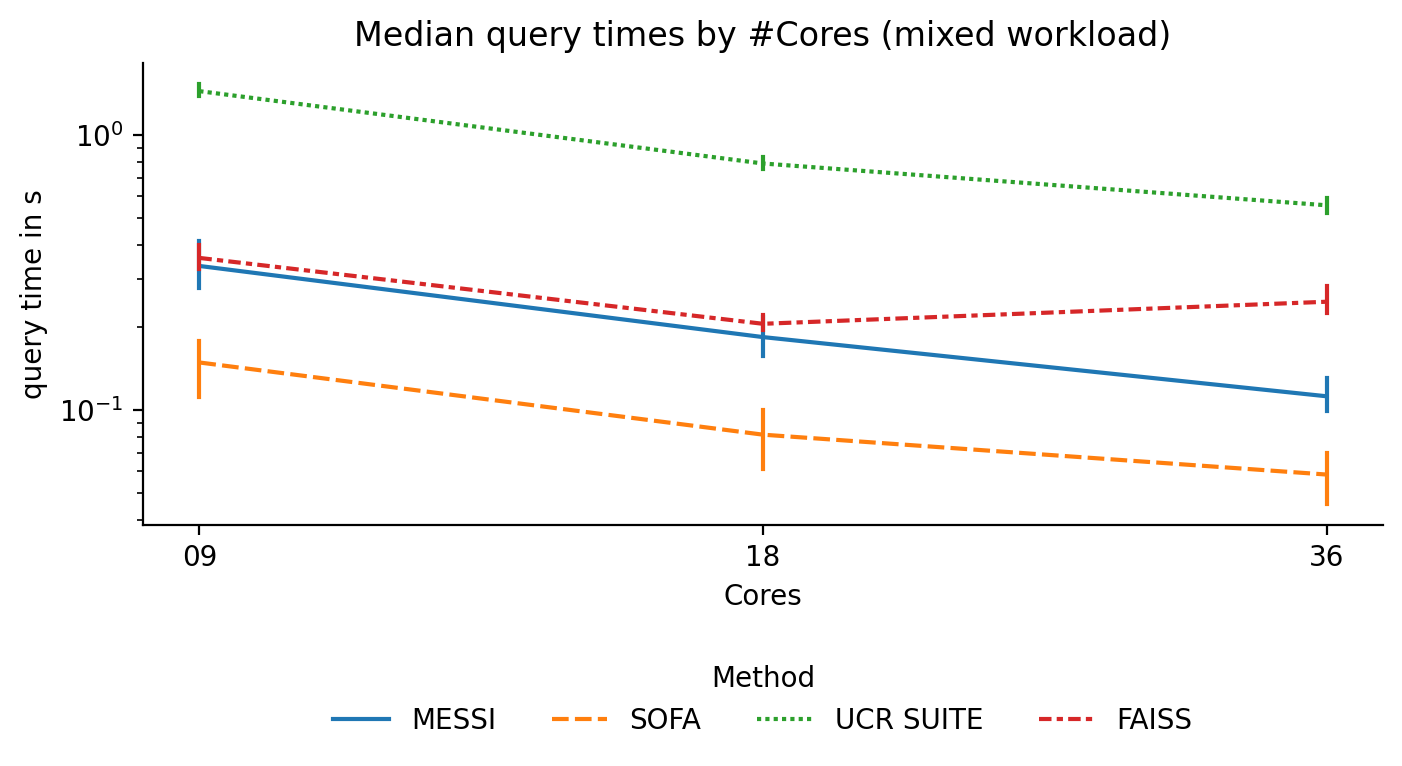

In [12]:
fig, ax = plt.subplots(figsize=(8,3))
sns.lineplot(x="Cores", y="query time in s", hue="Method", estimator=np.median,  err_style="bars", 
             style="Method", data=subset, ax = ax, errorbar=('ci', 99))
ax.set_title("Median query times by #Cores (mixed workload)")
# ax.set_xticklabels(g.get_xticklabels(), rotation=-30)
ax.set_xlabel("Cores")
sns.despine()
sns.move_legend(ax, "upper center", frameon=False, bbox_to_anchor=(.5, -0.25), ncol=4)  # bbox_to_anchor=(1, 1), 
plt.savefig("images/experiment_scalability_median_cores.pdf", bbox_inches='tight')
ax.set_yscale("log")
plt.show()

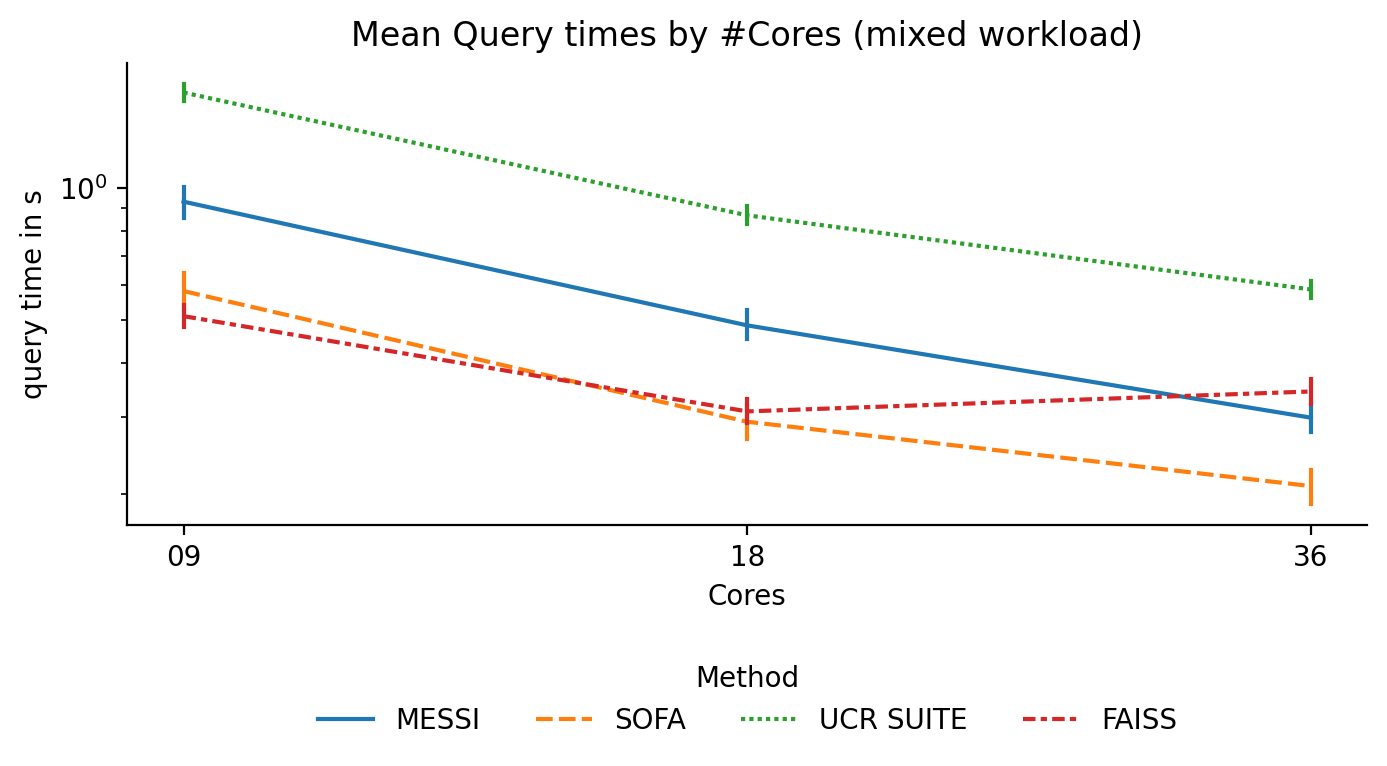

In [13]:
fig, ax = plt.subplots(figsize=(8,3))
sns.lineplot(x="Cores", y="query time in s", hue="Method", estimator=np.mean,  err_style="bars", 
             style="Method", data=subset, ax = ax, errorbar=('ci', 99))
ax.set_title("Mean Query times by #Cores (mixed workload)")
# ax.set_xticklabels(g.get_xticklabels(), rotation=-30)
ax.set_xlabel("Cores")
sns.despine()
ax.set_yscale("log")
sns.move_legend(ax, "upper center", frameon=False, bbox_to_anchor=(.5, -0.25), ncol=4)  # bbox_to_anchor=(1, 1), 
plt.savefig("images/experiment_scalability_mean_cores.pdf", bbox_inches='tight')
plt.show()

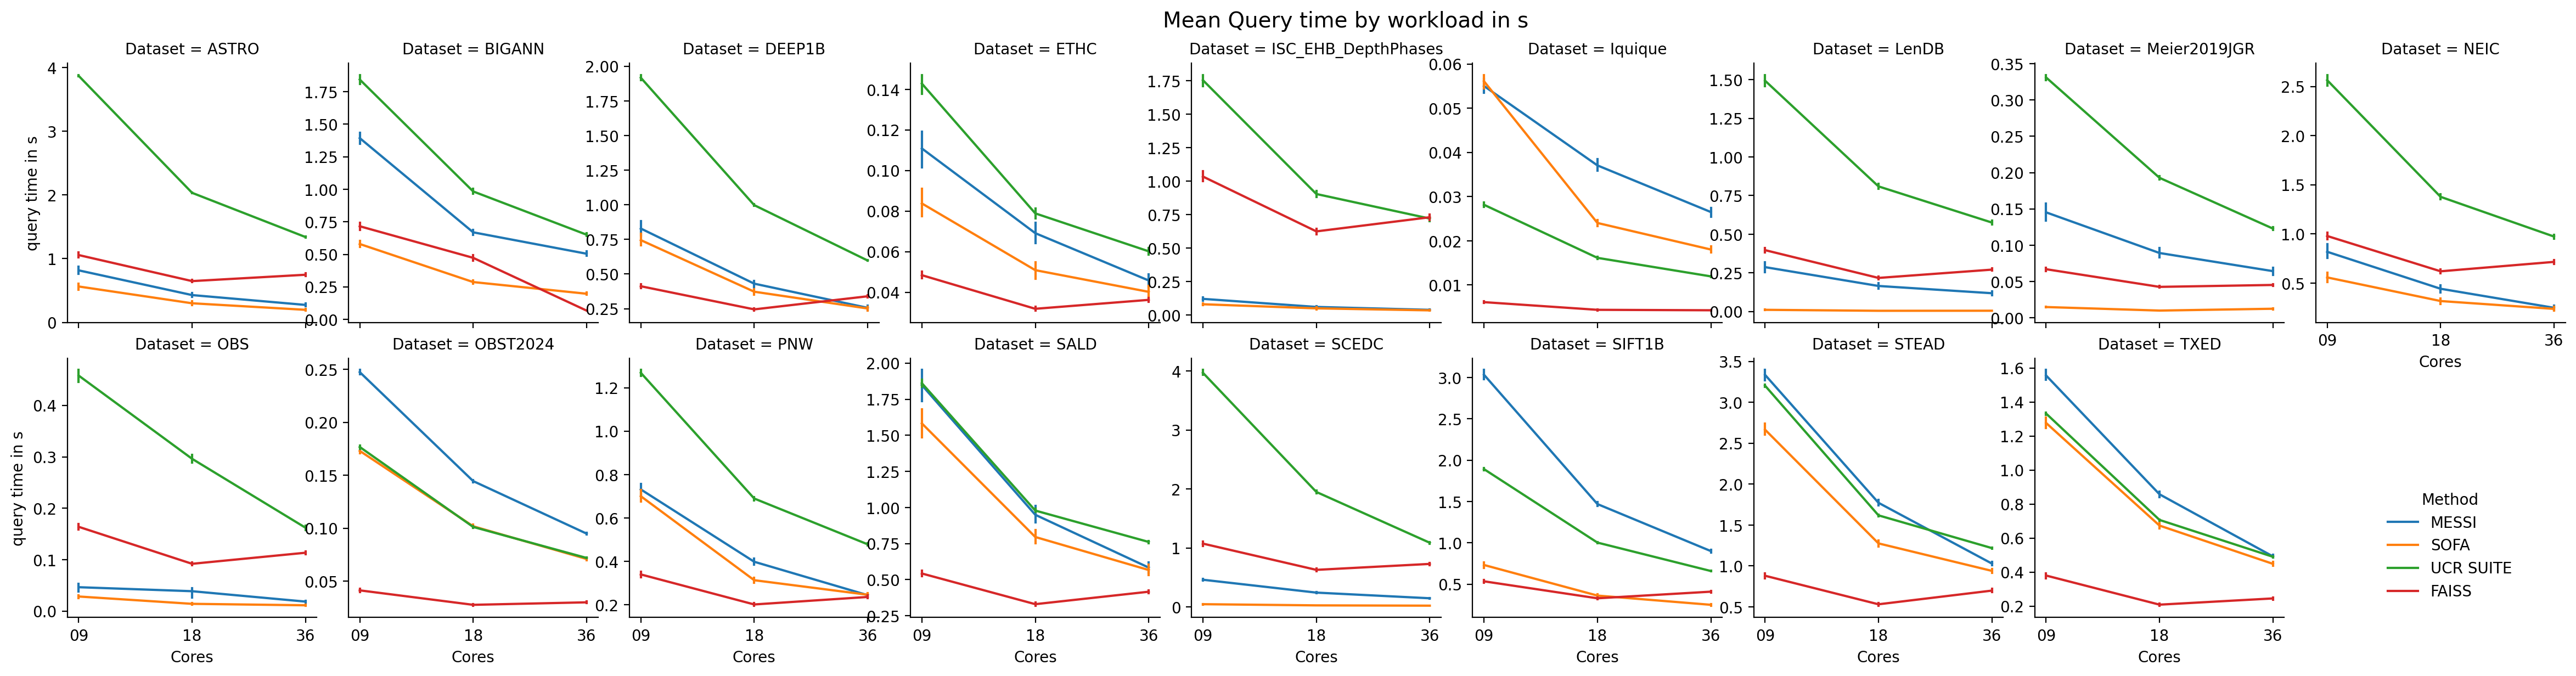

In [14]:
g = sns.relplot(
    x="Cores", y="query time in s", hue="Method", estimator=np.mean,  
    err_style="bars", 
    col="Dataset", col_wrap=9, facet_kws={'sharey': False, 'sharex': True}, 
    legend="brief",
    data=subset, kind="line", errorbar=('ci', 50))
g.fig.set_figwidth(24)
g.fig.set_figheight(6)
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Mean Query time by workload in s', size=14)
# g.set(yscale="log")
# g.set(title='Median Query time')
# g.ax.set_title("Average  Query time by #Cores")
# ax.set_xticklabels(g.get_xticklabels(), rotation=-30)
# ax.set_xlabel("Cores")
# sns.move_legend(g.ax, loc="upper center", frameon=False, bbox_to_anchor=(.5, -0.25), ncol=4)  # bbox_to_anchor=(1, 1), 

leg = g._legend
leg.set_bbox_to_anchor([0.93, 0.3])
leg.set_loc("upper center")

sns.despine()
# ax.set_yscale("log")
plt.savefig("images/experiment_scalability_mean_all.pdf", bbox_inches='tight')
plt.show()

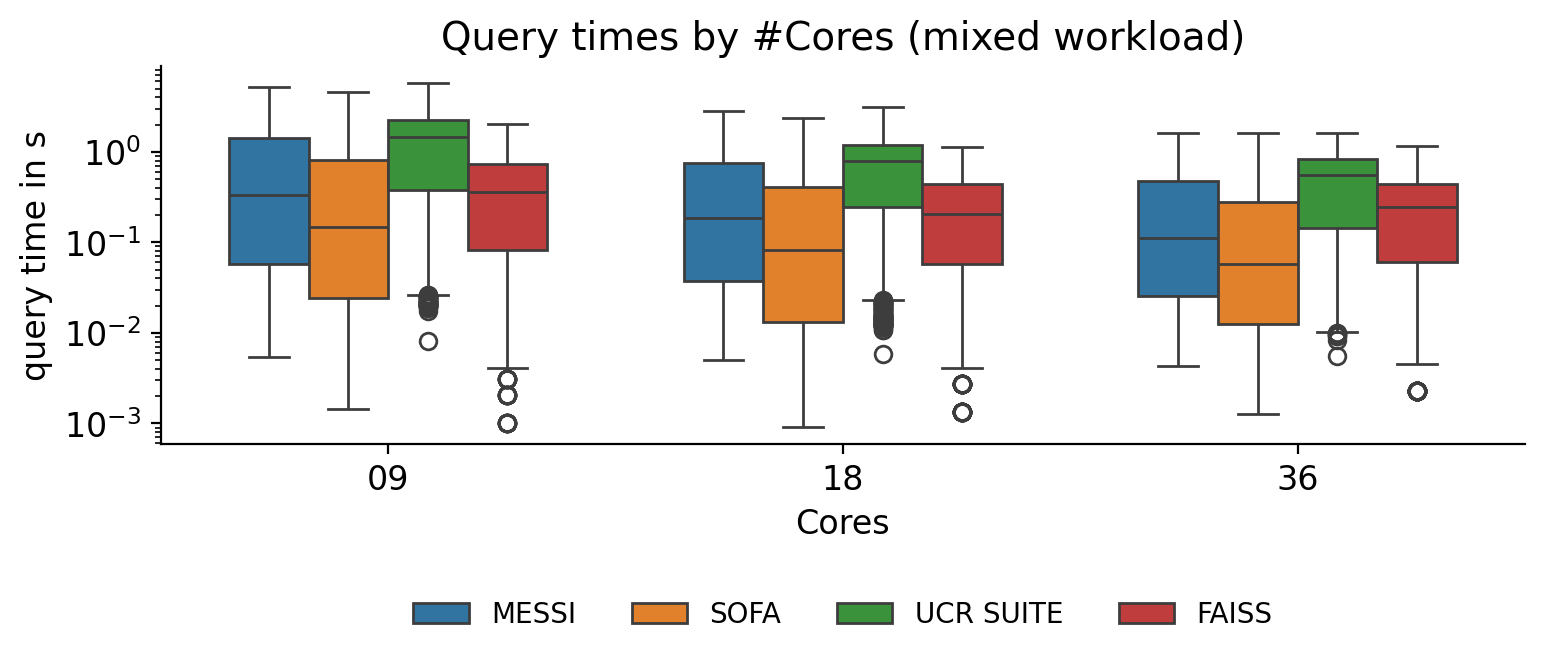

In [21]:

with plt.style.context({
    'font.size': 16,          # Default font size
    'axes.titlesize': 14,     # Font size for axes titles
    'axes.labelsize': 12,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 10,    # Font size for legend
    'figure.titlesize': 14    # Font size for figure title
}):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.set_title("Query times by #Cores (mixed workload)")
    ax.set_xlabel("Cores")
    sns.despine()
    ax.set_yscale("log")
    
    sns.boxplot(hue="Method", y="query time in s", x="Cores", data=subset, width=.7)
    
    legend = ax.legend() # removes the title
    
    sns.move_legend(ax, "upper center", frameon=False, bbox_to_anchor=(.5, -0.35), ncol=4)
    plt.tight_layout()

        
    plt.savefig("images/experiment_boxplot_mean_query_time.pdf", bbox_inches='tight')
    plt.show()

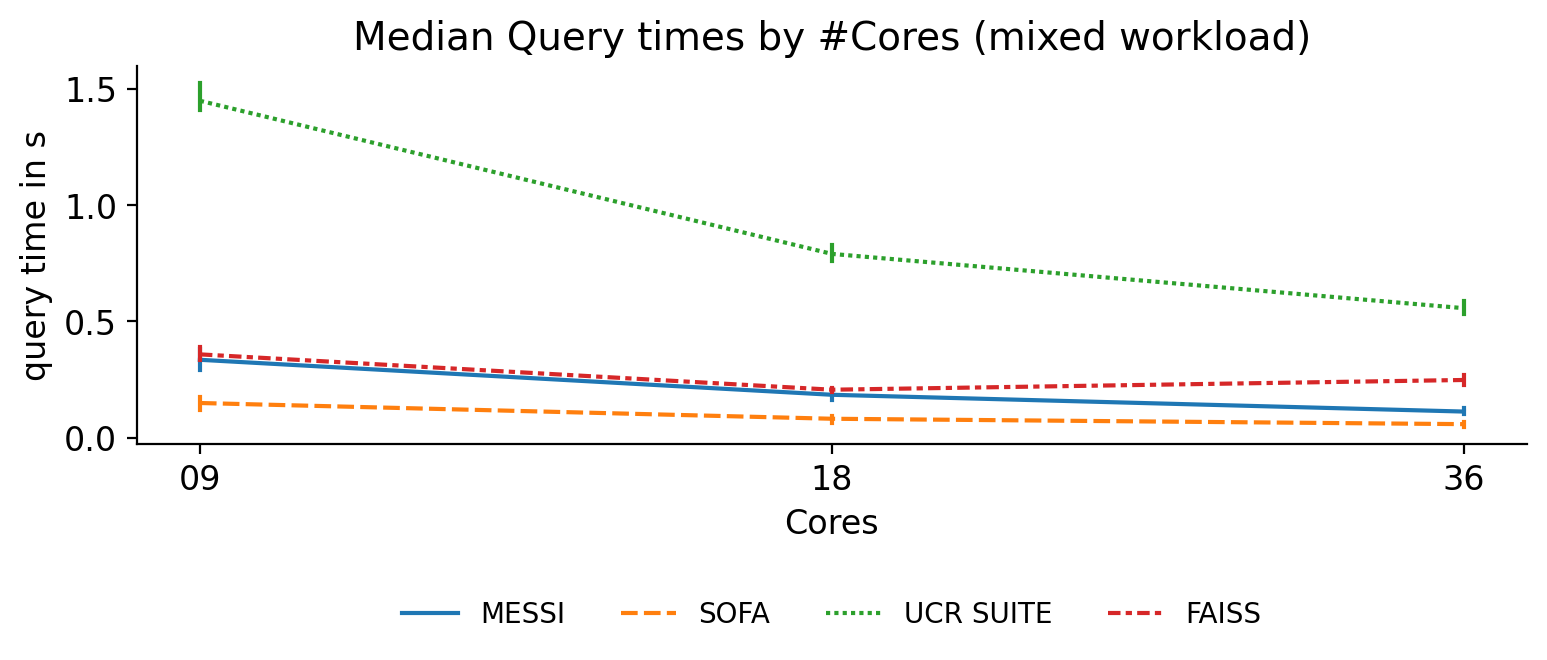

In [16]:

with plt.style.context({
    'font.size': 16,          # Default font size
    'axes.titlesize': 14,     # Font size for axes titles
    'axes.labelsize': 12,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 10,    # Font size for legend
    'figure.titlesize': 14    # Font size for figure title
}):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.set_title("Median Query times by #Cores (mixed workload)")
    ax.set_xlabel("Cores")
    sns.despine()
    #ax.set_yscale("log")
    
    sns.lineplot(hue="Method", y="query time in s", x="Cores", data=subset, estimator=np.median,  err_style="bars", 
                 style="Method", ax = ax)
    
    legend = ax.legend() # removes the title
    
    sns.move_legend(ax, "upper center", frameon=False, bbox_to_anchor=(.5, -0.35), ncol=4)
    plt.tight_layout()

        
    plt.savefig("images/experiment_lineplot_median_query_time_by_core.pdf", bbox_inches='tight')
    plt.show()

In [17]:
result_median = subset.groupby(["Method","Cores"])["query time in s"].median().transform(lambda l: str(np.round(l * 1000))+" ms")
result_median

Method     Cores
FAISS      09        358.0 ms
           18        206.0 ms
           36        248.0 ms
MESSI      09        335.0 ms
           18        185.0 ms
           36        112.0 ms
SOFA       09        149.0 ms
           18         81.0 ms
           36         58.0 ms
UCR SUITE  09       1448.0 ms
           18        790.0 ms
           36        557.0 ms
Name: query time in s, dtype: object

In [18]:
result_mean = subset.groupby(["Method","Cores"])["query time in s"].mean().transform(lambda l: str(np.round(l * 1000))+" ms")
result_mean

Method     Cores
FAISS      09        510.0 ms
           18        309.0 ms
           36        344.0 ms
MESSI      09        932.0 ms
           18        486.0 ms
           36        299.0 ms
SOFA       09        582.0 ms
           18        293.0 ms
           36        209.0 ms
UCR SUITE  09       1654.0 ms
           18        867.0 ms
           36        587.0 ms
Name: query time in s, dtype: object

In [19]:
result_all = pd.concat([result_median, result_mean], axis=1)
print(result_all.to_latex())

\begin{tabular}{llll}
\toprule
          &    & query time in s & query time in s \\
Method & Cores &                 &                 \\
\midrule
FAISS & 09 &        358.0 ms &        510.0 ms \\
          & 18 &        206.0 ms &        309.0 ms \\
          & 36 &        248.0 ms &        344.0 ms \\
MESSI & 09 &        335.0 ms &        932.0 ms \\
          & 18 &        185.0 ms &        486.0 ms \\
          & 36 &        112.0 ms &        299.0 ms \\
SOFA & 09 &        149.0 ms &        582.0 ms \\
          & 18 &         81.0 ms &        293.0 ms \\
          & 36 &         58.0 ms &        209.0 ms \\
UCR SUITE & 09 &       1448.0 ms &       1654.0 ms \\
          & 18 &        790.0 ms &        867.0 ms \\
          & 36 &        557.0 ms &        587.0 ms \\
\bottomrule
\end{tabular}



/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_38277/4119511153.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(result_all.to_latex())
